In [42]:
import numpy as np
import pandas as pd
import os
import random
import re
import tensorflow as tf
import tqdm
from tensorflow.keras import layers
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
import scipy.cluster.hierarchy as sch
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


random.seed(407)

In [15]:
file_path = "french-theater.txt"

with open(file_path, "r", encoding="utf-8") as f:
    text = f.read()

#Splitting the text and sorting them into a dictionary
plays = re.split(r'###(\d{2})###\n', text)[1:]
plays_dict = {plays[i]: plays[i+1].strip().split("#######")[0] for i in range(0, len(plays), 2)}

#Test
print(f"\nPlay {1}:")
print(play_text[:500])


Play 1:
On nous faisait, Arbate, un fidèle rapport:
Rome en effet triomphe, et Mithridate est mort.
Les Romains, vers l'Euphrate, ont attaqué mon père,
Et trompé dans la nuit sa prudence ordinaire.
Après un long combat, tout son camp dispersé
Dans la foule des morts, en fuyant, l'a laissé,
Et j'ai su qu'un soldat dans les mains de Pompée
Avec son diadème a remis son épée.
Ainsi ce roi qui seul a durant quarante ans,
Lassé tout ce que Rome eut de chefs importants,
Et qui dans l'Orient balançant la fortun


In [28]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation
    tokens = word_tokenize(text)  
    tokens = [t for t in tokens if t not in stopwords.words("french")]  # Remove stopwords
    return tokens 

document_texts = []
for plays in plays_dict.values():
        document_texts.append(preprocess_text(plays))

In [31]:
document_texts_joined = [" ".join(tokens) for tokens in document_texts]

tfidf_vectorizer = TfidfVectorizer(max_features=5000)

tfidf_matrix = tfidf_vectorizer.fit_transform(document_texts_joined)
tfidf_matrix_dense = tfidf_matrix.toarray()

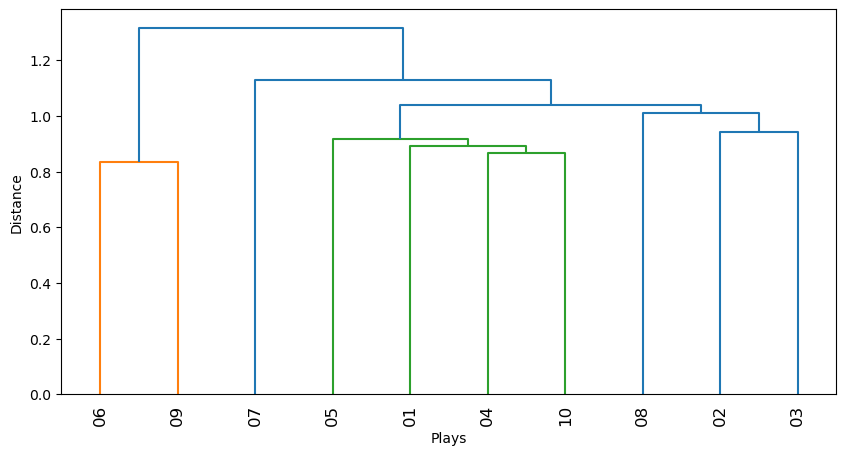

In [46]:
linkage_matrix = sch.linkage(tfidf_matrix_dense, method='ward')

plt.figure(figsize=(10, 5))
sch.dendrogram(linkage_matrix, labels=list(plays_dict.keys()), leaf_rotation=90)
plt.xlabel("Plays")
plt.ylabel("Distance")
plt.show()

In [44]:
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=407, n_init=10)

kmeans.fit(tfidf_matrix_dense)
cluster_labels = kmeans.labels_

# Clusters
for play, label in zip(plays_dict.keys(), cluster_labels):
    print(f"Play {play} -> Cluster {label}")

Play 01 -> Cluster 1
Play 02 -> Cluster 1
Play 03 -> Cluster 1
Play 04 -> Cluster 1
Play 05 -> Cluster 1
Play 06 -> Cluster 0
Play 07 -> Cluster 1
Play 08 -> Cluster 1
Play 09 -> Cluster 0
Play 10 -> Cluster 1


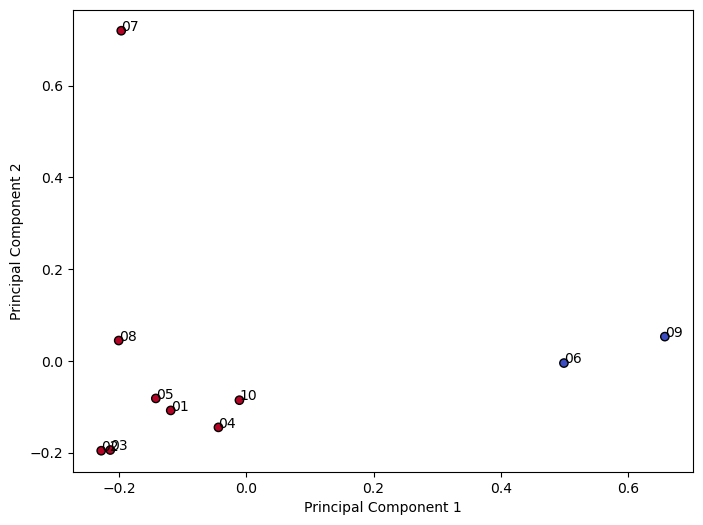

In [45]:
pca = PCA(n_components=2)
tfidf_pca = pca.fit_transform(tfidf_matrix_dense)

plt.figure(figsize=(8,6))
plt.scatter(tfidf_pca[:,0], tfidf_pca[:,1], c=cluster_labels, cmap="coolwarm", edgecolors="k")
for i, play_num in enumerate(plays_dict.keys()):
    plt.annotate(play_num, (tfidf_pca[i,0], tfidf_pca[i,1]))

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()